# Importando as libraries

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

import warnings
warnings.filterwarnings('ignore')

In [52]:
# Carregando os datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [53]:
train

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


In [54]:
train.isnull().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [55]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [56]:
test

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0
...,...,...,...,...,...
28507,3029395,2017-08-31,9,POULTRY,1
28508,3029396,2017-08-31,9,PREPARED FOODS,0
28509,3029397,2017-08-31,9,PRODUCE,1
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9


In [57]:
test.isnull().sum()

id             0
date           0
store_nbr      0
family         0
onpromotion    0
dtype: int64

In [58]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           28512 non-null  int64 
 1   date         28512 non-null  object
 2   store_nbr    28512 non-null  int64 
 3   family       28512 non-null  object
 4   onpromotion  28512 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


In [59]:
# Convertendo a data em um formato adequado
train['date'] = pd.to_datetime(train['date'])
test['date'] = pd.to_datetime(test['date'])

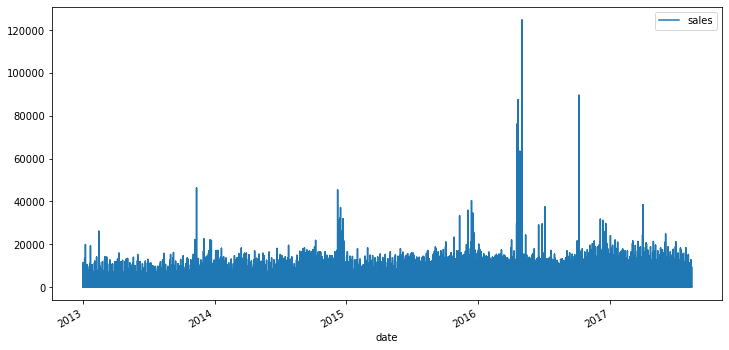

In [60]:
# plotando gráfico
fig, ax = plt.subplots(figsize=(12,6))
train.plot(x='date', y='sales', ax=ax);

In [61]:
# criar features para ano
train['year'] = train.date.dt.year

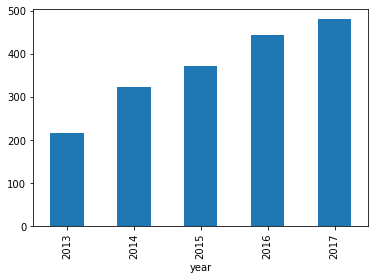

In [62]:
# plotar os valores em função dos anos
train.groupby('year').sales.mean().plot.bar();

In [63]:
# Criando uma coluna para a combinação de loja e família de produtos
train['store_family'] = train['store_nbr'].astype(str) + '_' + train['family']
test['store_family'] = test['store_nbr'].astype(str) + '_' + test['family']

In [64]:
# Criando uma lista com todas as combinações de loja e família de produtos
store_families = train['store_family'].unique()

In [65]:
store_families

array(['1_AUTOMOTIVE', '1_BABY CARE', '1_BEAUTY', ..., '9_PRODUCE',
       '9_SCHOOL AND OFFICE SUPPLIES', '9_SEAFOOD'], dtype=object)

In [16]:
# Fazendo a previsão de vendas para cada combinação de loja e família de produtos
predictions = []
for sf in store_families:
    # Filtrando os dados apenas para a combinação de loja e família de produtos atual
    train_sf = train[train['store_family'] == sf]
    test_sf = test[test['store_family'] == sf]
    
    # Ajustando o modelo
    model = ARIMA(train_sf['sales'], order=(2, 1, 1))
    model_fit = model.fit()

    # Fazendo as previsões
    forecast = model_fit.forecast(steps=len(test_sf))
    predictions.append(forecast)

In [83]:
test

,id,date,store_nbr,family,onpromotion,store_family
0,3000888,2017-08-16,1,AUTOMOTIVE,0,1_AUTOMOTIVE
1,3000889,2017-08-16,1,BABY CARE,0,1_BABY CARE
2,3000890,2017-08-16,1,BEAUTY,2,1_BEAUTY
3,3000891,2017-08-16,1,BEVERAGES,20,1_BEVERAGES
4,3000892,2017-08-16,1,BOOKS,0,1_BOOKS
...,...,...,...,...,...,...
28507,3029395,2017-08-31,9,POULTRY,1,9_POULTRY
28508,3029396,2017-08-31,9,PREPARED FOODS,0,9_PREPARED FOODS
28509,3029397,2017-08-31,9,PRODUCE,1,9_PRODUCE
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9,9_SCHOOL AND OFFICE SUPPLIES


In [17]:
# Criando dataframe com as previsões
df_predictions = pd.DataFrame(np.concatenate(predictions))
df_predictions

,0
0,4.690320
1,4.519522
2,4.480236
3,4.489960
4,4.492196
...,...
28507,17.946881
28508,17.946880
28509,17.946880
28510,17.946880


In [18]:
# Concatenando as previsões em um DataFrame
submission = pd.concat([test['id'], df_predictions], axis=1)
submission.columns = ['id', 'sales']

In [19]:
# Salvando o arquivo de submissão
submission#.to_csv('submission.csv', index=False)

,id,sales
0,3000888,4.690320
1,3000889,4.519522
2,3000890,4.480236
3,3000891,4.489960
4,3000892,4.492196
...,...,...
28507,3029395,17.946881
28508,3029396,17.946880
28509,3029397,17.946880
28510,3029398,17.946880


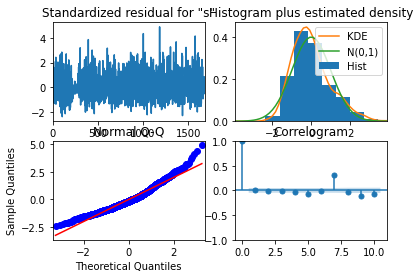

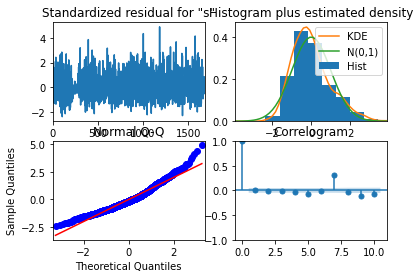

In [20]:
model_fit.plot_diagnostics()

## Avaliação

In [41]:
from sklearn.metrics import mean_squared_error

def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return rmse


In [108]:
# Concatenar os valores previstos com os valores reais
submission_sales = pd.concat([submission['id'], submission['sales'], train['sales']], axis=1)
submission_sales

,id,sales,sales
0,3000888.0,4.690320,0.000
1,3000889.0,4.519522,0.000
2,3000890.0,4.480236,0.000
3,3000891.0,4.489960,0.000
4,3000892.0,4.492196,0.000
...,...,...,...
3000883,NaN,NaN,438.133
3000884,NaN,NaN,154.553
3000885,NaN,NaN,2419.729
3000886,NaN,NaN,121.000


Essa linha de código concatena três colunas em um novo DataFrame. As três colunas são:

A coluna 'id' do DataFrame 'submission'
A coluna 'sales' do DataFrame 'submission'
A coluna 'sales' do DataFrame 'train'
O novo DataFrame resultante terá três colunas: 'id', 'sales' (previstos) e 'sales' (reais), que correspondem aos valores de venda previstos e reais para cada combinação de loja e família de produtos. A concatenação é feita utilizando o método concat() do pandas, passando as três colunas como argumentos e definindo os rótulos das colunas no parâmetro axis=1.

In [109]:
# Renomear as colunas
submission_sales.columns = ['id', 'sales_predicted', 'sales_actual']
submission_sales

,id,sales_predicted,sales_actual
0,3000888.0,4.690320,0.000
1,3000889.0,4.519522,0.000
2,3000890.0,4.480236,0.000
3,3000891.0,4.489960,0.000
4,3000892.0,4.492196,0.000
...,...,...,...
3000883,NaN,NaN,438.133
3000884,NaN,NaN,154.553
3000885,NaN,NaN,2419.729
3000886,NaN,NaN,121.000


In [110]:
#Dei um drop nos valores nulos que foram completados automaticamente na coluna id e vendas por conta do filtro da store_family
submission_sales.dropna(inplace=True)

In [111]:
submission_sales

,id,sales_predicted,sales_actual
0,3000888.0,4.690320,0.000
1,3000889.0,4.519522,0.000
2,3000890.0,4.480236,0.000
3,3000891.0,4.489960,0.000
4,3000892.0,4.492196,0.000
...,...,...,...
28507,3029395.0,17.946881,310.617
28508,3029396.0,17.946880,54.000
28509,3029397.0,17.946880,0.000
28510,3029398.0,17.946880,0.000


In [112]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(submission_sales['sales_actual'], submission_sales['sales_predicted'])
mse = mean_squared_error(submission_sales['sales_actual'], submission_sales['sales_predicted'])

print('MAE:', mae)
print('MSE:', mse)

MAE: 595.0813349263981
MSE: 2061467.6392141369


In [134]:
#Calcular o erro logarítmico para cada linha do dataframe:
log_error = np.log1p(submission_sales['sales_predicted']) - np.log1p(submission_sales['sales_actual'])

#Elevar ao quadrado o erro logarítmico:
log_error_squared = np.power(log_error, 2)

#Calcular a média do erro logarítmico ao quadrado:
mean_log_error_squared = np.mean(log_error_squared)

#Calcular a raiz quadrada da média do erro logarítmico ao quadrado:
RMSLE = np.sqrt(mean_log_error_squared)
RMSLE

4.047632450896017

In [118]:
submission.to_csv('submission.csv', index=False, header=['id', 'sales'])

# Treinar e avaliar um modelo SARIMA em cada combinação de loja e família de produtos:

In [121]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_log_error


In [123]:
sarima_preds = []
for sf in store_families:
    # Filtrando os dados apenas para a combinação de loja e família de produtos atual
    train_sf = train[train['store_family'] == sf]
    test_sf = test[test['store_family'] == sf]
    
    # Ajustando o modelo
    model_sarima = SARIMAX(train_sf['sales'], order=(2, 1, 1), seasonal_order=(1,1,1,7))
    model_sarima_fit = model_sarima.fit()
    
    # Fazendo as previsões
    forecast = model_sarima_fit.forecast(steps=len(test_sf))
    sarima_preds.append(forecast)

In [124]:
# Criando dataframe com as previsões
df_sarima_preds = pd.DataFrame(np.concatenate(sarima_preds))
df_sarima_preds

,0
0,4.531325
1,4.634333
2,6.273972
3,5.404553
4,2.782860
...,...
28507,23.071333
28508,16.007137
28509,14.923949
28510,15.540443


In [125]:
# Concatenando as previsões em um DataFrame
submission_sarima = pd.concat([test['id'], df_sarima_preds], axis=1)
submission_sarima.columns = ['id', 'sales']

In [126]:
submission_sarima

,id,sales
0,3000888,4.531325
1,3000889,4.634333
2,3000890,6.273972
3,3000891,5.404553
4,3000892,2.782860
...,...,...
28507,3029395,23.071333
28508,3029396,16.007137
28509,3029397,14.923949
28510,3029398,15.540443


In [127]:
# Concatenar os valores previstos com os valores reais
submission_sarima_sales = pd.concat([submission_sarima['id'], submission_sarima['sales'], train['sales']], axis=1)
submission_sarima_sales

,id,sales,sales
0,3000888.0,4.531325,0.000
1,3000889.0,4.634333,0.000
2,3000890.0,6.273972,0.000
3,3000891.0,5.404553,0.000
4,3000892.0,2.782860,0.000
...,...,...,...
3000883,NaN,NaN,438.133
3000884,NaN,NaN,154.553
3000885,NaN,NaN,2419.729
3000886,NaN,NaN,121.000


In [128]:
# Renomeando as colunas
submission_sarima_sales.columns = ['id', 'sales_predicted', 'sales_actual']
submission_sarima_sales

,id,sales_predicted,sales_actual
0,3000888.0,4.531325,0.000
1,3000889.0,4.634333,0.000
2,3000890.0,6.273972,0.000
3,3000891.0,5.404553,0.000
4,3000892.0,2.782860,0.000
...,...,...,...
3000883,NaN,NaN,438.133
3000884,NaN,NaN,154.553
3000885,NaN,NaN,2419.729
3000886,NaN,NaN,121.000


In [131]:
#Dei um drop nos valores nulos que foram completados automaticamente na coluna id e vendas por conta do filtro da store_family
submission_sarima_sales.dropna(inplace=True)
submission_sarima_sales

,id,sales_predicted,sales_actual
0,3000888.0,4.531325,0.000
1,3000889.0,4.634333,0.000
2,3000890.0,6.273972,0.000
3,3000891.0,5.404553,0.000
4,3000892.0,2.782860,0.000
...,...,...,...
28507,3029395.0,23.071333,310.617
28508,3029396.0,16.007137,54.000
28509,3029397.0,14.923949,0.000
28510,3029398.0,15.540443,0.000


In [135]:
#Calcular o erro logarítmico para cada linha do dataframe:
log_error = np.log1p(submission_sarima_sales['sales_predicted']) - np.log1p(submission_sarima_sales['sales_actual'])

#Elevar ao quadrado o erro logarítmico:
log_error_squared = np.power(log_error, 2)

#Calcular a média do erro logarítmico ao quadrado:
mean_log_error_squared = np.mean(log_error_squared)

#Calcular a raiz quadrada da média do erro logarítmico ao quadrado:
RMSLE = np.sqrt(mean_log_error_squared)
RMSLE

4.034736899679374

In [137]:
submission_sarima.to_csv('submission.csv', index=False, header=['id', 'sales'])

## ETS

In [138]:
ets_preds = []
for sf in store_families:
    # Filtrando os dados apenas para a combinação de loja e família de produtos atual
    train_sf = train[train['store_family'] == sf]
    test_sf = test[test['store_family'] == sf]
    
    # Ajustando o modelo
    model_ets = ExponentialSmoothing(train_sf['sales'], trend='add', seasonal='add', seasonal_periods=7)
    fitted_model = model_ets.fit()
    
    # Fazendo as previsões
    #preds = fitted_model.forecast(15)
    forecast = fitted_model.forecast(steps=len(test_sf))
    ets_preds.append(forecast)

In [139]:
# Criando dataframe com as previsões
df_ets_preds = pd.DataFrame(np.concatenate(ets_preds))
df_ets_preds

,0
0,4.513001
1,4.665776
2,6.069321
3,5.319546
4,2.783460
...,...
28507,23.552870
28508,16.525865
28509,15.381312
28510,16.007293


In [145]:
# Concatenando as previsões em um DataFrame
submission_ets = pd.concat([test['id'], df_ets_preds], axis=1)
submission_ets.columns = ['id', 'sales']
submission_ets

,id,sales
0,3000888,4.513001
1,3000889,4.665776
2,3000890,6.069321
3,3000891,5.319546
4,3000892,2.783460
...,...,...
28507,3029395,23.552870
28508,3029396,16.525865
28509,3029397,15.381312
28510,3029398,16.007293


In [146]:
# Concatenar os valores previstos com os valores reais
submission_ets_sales = pd.concat([submission_ets['id'], submission_ets['sales'], train['sales']], axis=1)
submission_ets_sales

,id,sales,sales
0,3000888.0,4.513001,0.000
1,3000889.0,4.665776,0.000
2,3000890.0,6.069321,0.000
3,3000891.0,5.319546,0.000
4,3000892.0,2.783460,0.000
...,...,...,...
3000883,NaN,NaN,438.133
3000884,NaN,NaN,154.553
3000885,NaN,NaN,2419.729
3000886,NaN,NaN,121.000


In [147]:
# Renomeando as colunas
submission_ets_sales.columns = ['id', 'sales_predicted', 'sales_actual']
submission_ets_sales

,id,sales_predicted,sales_actual
0,3000888.0,4.513001,0.000
1,3000889.0,4.665776,0.000
2,3000890.0,6.069321,0.000
3,3000891.0,5.319546,0.000
4,3000892.0,2.783460,0.000
...,...,...,...
3000883,NaN,NaN,438.133
3000884,NaN,NaN,154.553
3000885,NaN,NaN,2419.729
3000886,NaN,NaN,121.000


In [148]:
#Dei um drop nos valores nulos que foram completados automaticamente na coluna id e vendas por conta do filtro da store_family
submission_ets_sales.dropna(inplace=True)
submission_ets_sales

,id,sales_predicted,sales_actual
0,3000888.0,4.513001,0.000
1,3000889.0,4.665776,0.000
2,3000890.0,6.069321,0.000
3,3000891.0,5.319546,0.000
4,3000892.0,2.783460,0.000
...,...,...,...
28507,3029395.0,23.552870,310.617
28508,3029396.0,16.525865,54.000
28509,3029397.0,15.381312,0.000
28510,3029398.0,16.007293,0.000


In [149]:
#Calcular o erro logarítmico para cada linha do dataframe:
log_error = np.log1p(submission_ets_sales['sales_predicted']) - np.log1p(submission_ets_sales['sales_actual'])

#Elevar ao quadrado o erro logarítmico:
log_error_squared = np.power(log_error, 2)

#Calcular a média do erro logarítmico ao quadrado:
mean_log_error_squared = np.mean(log_error_squared)

#Calcular a raiz quadrada da média do erro logarítmico ao quadrado:
RMSLE = np.sqrt(mean_log_error_squared)
RMSLE

3.9966248000701667

In [151]:
submission_ets.to_csv('submission_ets.csv', index=False, header=['id', 'sales'])